In [31]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pymongo


In [32]:
from pymongo import MongoClient


In [33]:
conection=MongoClient("mongodb://localhost:27017/")
db=conection.Iris
data=db.irisdata
df = pd.DataFrame(list(data.find()))
df

,_id,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5eba4ce2baecaafb981b6399,1,5.1,3.5,1.4,0.2,Iris-setosa
1,5eba4ce2baecaafb981b639a,2,4.9,3.0,1.4,0.2,Iris-setosa
2,5eba4ce2baecaafb981b639b,3,4.7,3.2,1.3,0.2,Iris-setosa
3,5eba4ce2baecaafb981b639c,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5eba4ce2baecaafb981b639d,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...,...
145,5eba4ce2baecaafb981b642a,146,6.7,3.0,5.2,2.3,Iris-virginica
146,5eba4ce2baecaafb981b642b,147,6.3,2.5,5.0,1.9,Iris-virginica
147,5eba4ce2baecaafb981b642c,148,6.5,3.0,5.2,2.0,Iris-virginica
148,5eba4ce2baecaafb981b642d,149,6.2,3.4,5.4,2.3,Iris-virginica


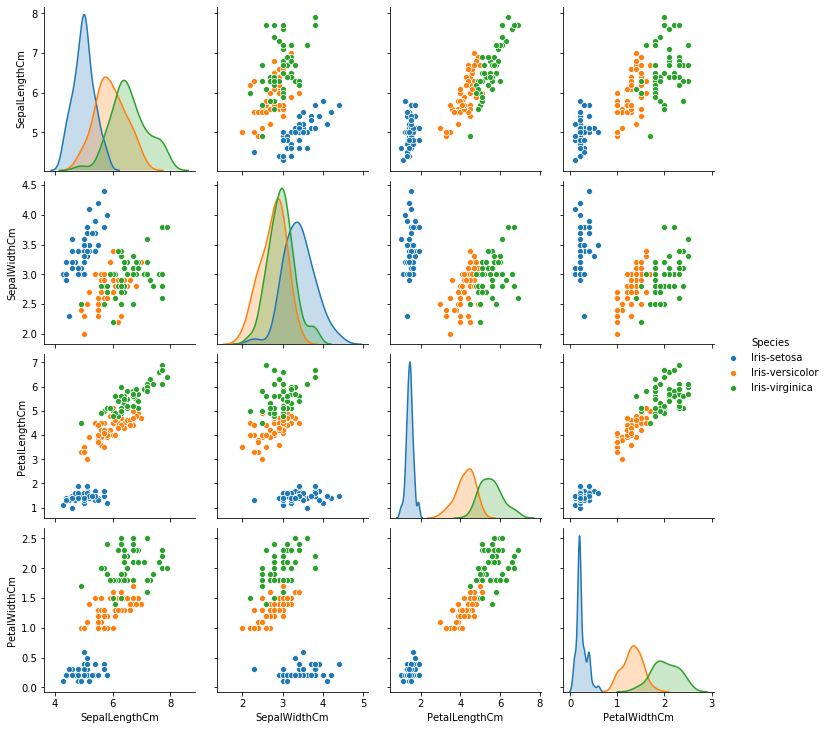

In [34]:
# view the relationships between variables; color code by species type
sns.pairplot(df.drop(labels=['Id'], axis=1), hue='Species')


In [35]:
# split data into training and test sets; set random state to 0 for reproducibility 
X_train, X_test, y_train, y_test = train_test_split(df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']],df['Species'], random_state=0) 

In [36]:
# see how data has been split
print("X_train shape: {}\ny_train shape: {}".format(X_train.shape, y_train.shape))
print("X_test shape: {}\ny_test shape: {}".format(X_test.shape, y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


In [37]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

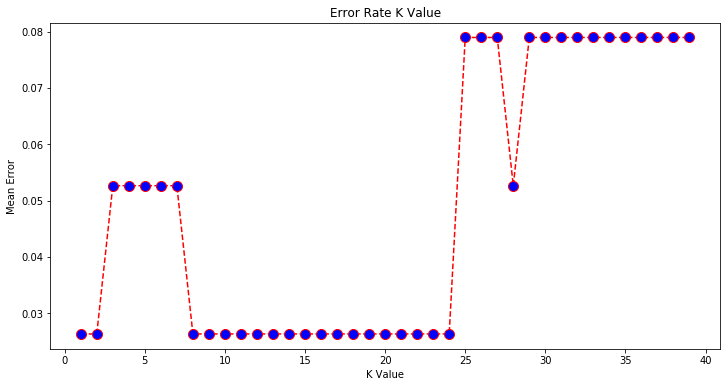

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [39]:
# initialize the Estimator object
knn = KNeighborsClassifier(n_neighbors=1)

In [40]:
# fit the model to training set in order to predict classes
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [41]:
# create a prediction array for our test set
y_pred = knn.predict(X_test)

In [42]:
# based on the training dataset, our model predicts the following for the test set:
pd.concat([X_test, y_test, pd.Series(y_pred, name='Predicted', index=X_test.index)],ignore_index=False, axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted
114,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica
62,6.1,2.9,4.7,1.4,Iris-versicolor,Iris-versicolor
33,5.5,3.5,1.3,0.2,Iris-setosa,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa
100,5.8,2.7,5.1,1.9,Iris-virginica,Iris-virginica
40,5.0,3.5,1.6,0.6,Iris-setosa,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor,Iris-versicolor


In [43]:
# what is our score?
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
